In [ ]:
import cv2 as cv
import sys

array([[[ 21,  79, 101],
        [ 34,  92, 114],
        [ 56, 116, 138],
        ...,
        [ 27, 107, 124],
        [ 19,  97, 114],
        [ 22, 100, 117]],

       [[ 29,  87, 109],
        [ 37,  95, 117],
        [ 54, 114, 136],
        ...,
        [ 27, 107, 124],
        [ 23, 101, 118],
        [ 27, 105, 122]],

       [[ 36,  93, 114],
        [ 40,  99, 119],
        [ 50, 111, 131],
        ...,
        [ 30, 108, 125],
        [ 27, 103, 121],
        [ 33, 109, 127]],

       ...,

       [[ 13,  13,  29],
        [ 18,  18,  34],
        [ 16,  16,  34],
        ...,
        [  2,   5,  20],
        [  4,   5,  19],
        [  7,   8,  22]],

       [[ 13,  13,  31],
        [ 17,  17,  35],
        [ 14,  13,  33],
        ...,
        [  5,   8,  23],
        [  5,   6,  20],
        [  7,   8,  22]],

       [[ 10,  10,  28],
        [ 14,  14,  32],
        [ 11,  10,  30],
        ...,
        [  6,   9,  24],
        [  5,   6,  20],
        [  5,   6,  20]]], dtype=uint8)
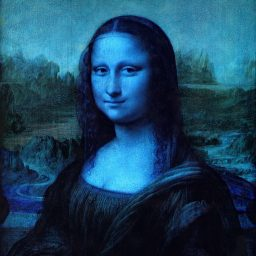

In [ ]:
img = cv.imread('/content/Mona_Lisa-256x256.jpeg')
img

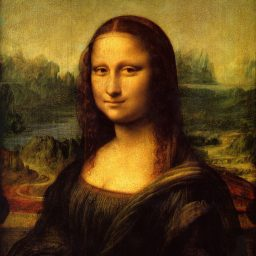

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)


In [ ]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

array([[ 79,  92, 116, ..., 103,  93,  96],
       [ 87,  95, 114, ..., 103,  97, 101],
       [ 93,  98, 110, ..., 104, 100, 106],
       ...,
       [ 18,  23,  21, ...,   9,   9,  12],
       [ 18,  22,  19, ...,  12,  10,  12],
       [ 15,  19,  16, ...,  13,  10,  10]], dtype=uint8)
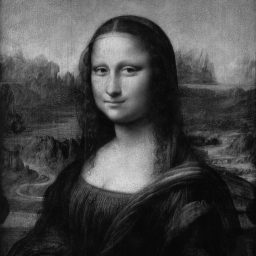

In [ ]:
gray_img

In [ ]:
import numpy as np
gray_img = gray_img.astype(np.float64)

In [ ]:
U, s, V = np.linalg.svd(gray_img, full_matrices=False)

In [ ]:
print(f"U.shape:{U.shape}, s.shape:{s.shape}, V.shape: {V.shape}")

U.shape:(256, 256), s.shape:(256,), V.shape: (256, 256)


In [ ]:
top_30_singular_values = s[:30]
print("Top 30 Singular Values: \n", top_30_singular_values)

Top 30 Singular Values: 
 [21428.83161605  6748.58235338  3498.79805946  2547.96283475
  2077.46875177  1635.55943723  1517.2014175   1288.51745459
  1106.99964606   952.67034625   856.78805136   798.05425222
   738.62805577   651.13179217   600.46368448   574.75443091
   561.3727985    479.95161544   440.8603768    420.11993663
   389.88326158   382.49521262   381.46594897   363.29183982
   345.43962882   339.45320528   316.66567889   308.84596831
   284.33870806   271.61894919]


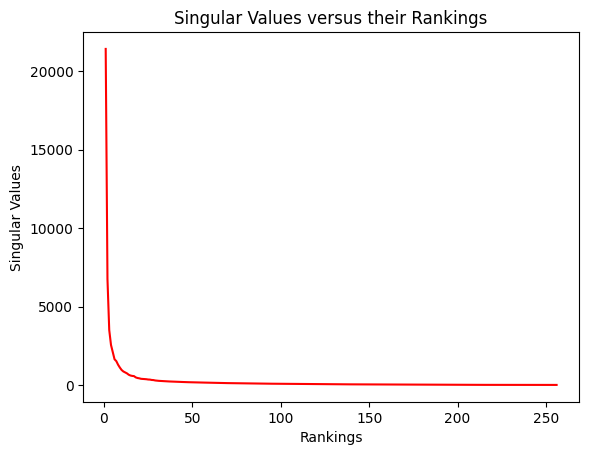

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(s) + 1), s, 'r-')
plt.xlabel("Rankings")
plt.ylabel("Singular Values")
plt.title("Singular Values versus their Rankings")
plt.savefig("Singular_values_vs_rankings.png")
plt.show()

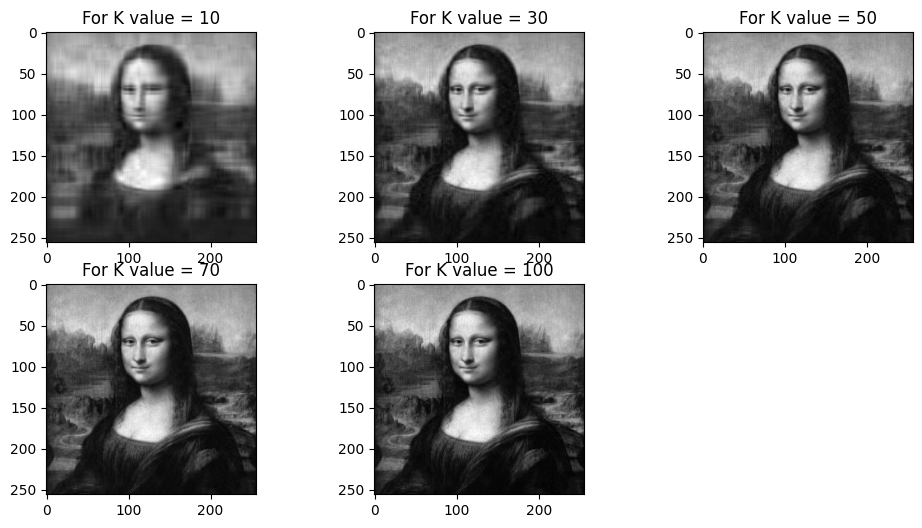

In [ ]:

# from k=30 the image is compressed
k_values = [10, 30, 50, 70, 100]

plt.figure(figsize=(12,6))

for i in range(len(k_values)):
    low_rank = U[:, :k_values[i]] @ np.diag(s[:k_values[i]]) @ V[:k_values[i], :]
    plt.subplot(2,3,i+1),
    plt.imshow(low_rank, cmap='gray'),
    plt.title(f"For K value = {k_values[i]}")
    plt.savefig("Reconstruction_with_k_values.png")

In [ ]:
# get three methods to compare the quality of the compressed image and the originalc, using k = 30
cmp_img = low_rank[1]
cmp_img

(array([ 86.88359856,  95.4104963 , 112.67689651, 117.82143821,
        116.5118878 , 126.31797104, 130.31107342, 125.63923118,
        126.2619194 , 133.59916995, 125.16551591, 122.27657568,
        124.393082  , 124.6688228 , 134.27509409, 131.9533242 ,
        145.52623187, 141.39270307, 135.14744974, 134.92426573,
        137.15880874, 140.80991043, 122.86567685, 134.16647951,
        126.51934439, 130.72675427, 125.36010581, 130.98152929,
        124.87801995, 133.53978433, 128.75515718, 130.39074483,
        124.74606811, 131.19396995, 124.34388951, 132.04120518,
        132.28421526, 142.7457123 , 134.70431875, 131.55227452,
        131.67759911, 135.04553702, 136.64283798, 133.28405833,
        134.60688456, 129.86114763, 127.79731447, 129.98130007,
        128.80937111, 121.97218385, 129.44184363, 127.42354848,
        123.72539871, 119.68916817, 117.72369802, 123.20877629,
        121.98242287, 123.82164162, 119.94021453, 122.44805684,
        113.02787628, 118.43298904, 113.

In [ ]:
cmp_img.shape, img.shape

array([[ 81.50401628,  91.31950736, 113.83904863, ..., 103.31675278,
         95.45821866,  95.9049014 ],
       [ 86.88359856,  95.4104963 , 112.67689651, ..., 104.31549214,
         97.36689975,  99.09962869],
       [ 90.75559105,  98.18325824, 111.49512739, ..., 104.66674371,
        100.66772132, 104.26107918],
       ...,
       [ 17.86332709,  22.19458952,  19.80091265, ...,  10.14027918,
          6.8398142 ,   9.73800146],
       [ 17.78004005,  20.50418212,  19.12239393, ...,  12.35453959,
          8.7561955 ,  10.1041444 ],
       [ 15.55487587,  16.0513742 ,  15.96278025, ...,  13.59055951,
          9.02521269,   9.55004359]])

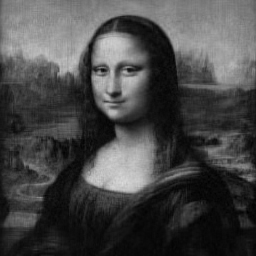

In [ ]:
cmp1_img = U[:, :50]*np.diag(s[:50])*V[:50, :]/
cv2_imshow( cmp1_img)

###MSE


In [ ]:
def mse(img1, img2):
   h, w = img1.shape
   diff = cv.subtract(img1, img2)
   err = np.sum(diff**2)
   mse = err/(float(h*w))
   return mse

In [ ]:
error = mse(gray_img, cmp1_img)
error

11.936983406778326

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Flatten the pixel values of the original and compressed images
original_flat = gray_img.flatten()
compressed_flat = cmp1_img.flatten()

# Reshape the flattened arrays to ensure they have the same shape
original_flat = original_flat.reshape(1, -1)
compressed_flat = compressed_flat.reshape(1, -1)

# Compute cosine similarity
cosine_sim = cosine_similarity(original_flat, compressed_flat)

# Print the cosine similarity score
print("Cosine Similarity:", cosine_sim[0, 0])

Cosine Similarity: 0.9992798316435986


In [ ]:
from skimage.metrics import mean_squared_error
mse_score = mean_squared_error(gray_img,cmp1_img)
mse_score

11.936983406778326